In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
covid_data = pd.read_csv("Provincial_Daily_Totals.csv")

In [3]:
covid_data.shape

(5115, 21)

In [4]:
covid_data.head(10)

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,Date,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,...,TotalTested,DailyTested,TotalActive,DailyActive,TotalHospitalized,DailyHospitalized,TotalICU,DailyICU,TotalVaccinated,DailyVaccinated
0,1,ALBERTA,AB,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NWT,NT,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,YUKON,YT,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,SASKATCHEWAN,SK,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,PEI,PE,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,ONTARIO,ON,1,2020/01/25 12:00:00+00,1/25/2020,1,0,0,0,...,0,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NEW BRUNSWICK,NB,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,8,REPATRIATED,RC,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NOVA SCOTIA,NS,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NL,NL,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5115 entries, 0 to 5114
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           5115 non-null   int64  
 1   Province           5115 non-null   object 
 2   Abbreviation       5115 non-null   object 
 3   DailyTotals        5115 non-null   int64  
 4   SummaryDate        5115 non-null   object 
 5   Date               5115 non-null   object 
 6   TotalCases         5115 non-null   int64  
 7   TotalRecovered     5115 non-null   int64  
 8   DailyRecovered     5115 non-null   int64  
 9   TotalDeaths        5115 non-null   int64  
 10  DailyDeaths        5115 non-null   int64  
 11  TotalTested        5115 non-null   int64  
 12  DailyTested        5115 non-null   int64  
 13  TotalActive        5115 non-null   int64  
 14  DailyActive        5107 non-null   float64
 15  TotalHospitalized  3990 non-null   float64
 16  DailyHospitalized  3990 

In [6]:
# the summary date is an object type, convert it into date time object
covid_data['SummaryDate'] = pd.to_datetime(covid_data['SummaryDate'])
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5115 entries, 0 to 5114
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   OBJECTID           5115 non-null   int64              
 1   Province           5115 non-null   object             
 2   Abbreviation       5115 non-null   object             
 3   DailyTotals        5115 non-null   int64              
 4   SummaryDate        5115 non-null   datetime64[ns, UTC]
 5   Date               5115 non-null   object             
 6   TotalCases         5115 non-null   int64              
 7   TotalRecovered     5115 non-null   int64              
 8   DailyRecovered     5115 non-null   int64              
 9   TotalDeaths        5115 non-null   int64              
 10  DailyDeaths        5115 non-null   int64              
 11  TotalTested        5115 non-null   int64              
 12  DailyTested        5115 non-null   int64        

In [7]:
covid_data.tail(10)

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,Date,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,...,TotalTested,DailyTested,TotalActive,DailyActive,TotalHospitalized,DailyHospitalized,TotalICU,DailyICU,TotalVaccinated,DailyVaccinated
5105,5477,BRITISH COLUMBIA,BC,485,2020-12-30 12:00:00+00:00,12/30/2020,51300,41681,506,893,...,1451775,6785,7551,-29.0,379.0,6.0,77.0,-3.0,NaN,NaN
5106,5478,NOVA SCOTIA,NS,3,2020-12-30 12:00:00+00:00,12/30/2020,1483,1393,8,65,...,234515,1592,25,-5.0,1.0,0.0,0.0,0.0,NaN,NaN
5107,5479,SASKATCHEWAN,SK,138,2020-12-30 12:00:00+00:00,12/30/2020,15160,12057,377,154,...,424533,1475,2949,-242.0,151.0,-31.0,32.0,0.0,NaN,NaN
5108,5480,ALBERTA,AB,1287,2020-12-30 12:00:00+00:00,12/30/2020,100428,84827,1499,1046,...,2780732,14807,14555,-230.0,921.0,31.0,152.0,-1.0,NaN,NaN
5109,5481,MANITOBA,MB,128,2020-12-30 12:00:00+00:00,12/30/2020,24513,19408,106,661,...,419542,1198,4444,20.0,248.0,2.0,32.0,0.0,NaN,NaN
5110,5482,QUEBEC,QC,2511,2020-12-30 12:00:00+00:00,12/30/2020,199822,170045,1984,8165,...,2498341,7966,21612,486.0,1211.0,80.0,152.0,4.0,NaN,NaN
5111,5483,ONTARIO,ON,2923,2020-12-30 12:00:00+00:00,12/30/2020,178831,153799,2237,4474,...,7632231,0,20558,667.0,1177.0,873.0,323.0,38.0,NaN,NaN
5112,5484,NORTHWEST TERRITORIES,NT,0,2020-12-30 12:00:00+00:00,12/30/2020,24,24,0,0,...,9693,79,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
5113,5485,REPATRIATED CDN,RC,0,2020-12-30 12:00:00+00:00,12/30/2020,13,13,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
5114,5486,CANADA,CA,7478,2020-12-30 12:00:00+00:00,12/30/2020,572982,484582,6726,15472,...,15759090,34809,71747,659.0,4091.0,960.0,769.0,37.0,NaN,NaN


In [8]:
covid_data.describe()

,OBJECTID,DailyTotals,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,TotalTested,DailyTested,TotalActive,DailyActive,TotalHospitalized,DailyHospitalized,TotalICU,DailyICU,TotalVaccinated,DailyVaccinated
count,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5.115000e+03,5115.000000,5115.000000,5107.000000,3990.000000,3990.000000,3990.000000,3990.000000,3.000000,3.000000
mean,2714.975367,224.037341,18413.521994,14450.354839,189.270772,910.557967,6.037928,6.556355e+05,6188.939589,3037.682893,28.340513,195.495990,2.022556,37.156391,0.385714,1497.666667,860.666667
std,1591.083324,766.891378,53895.570214,44179.220273,824.815016,2388.410470,21.189023,1.913452e+06,17489.018377,8833.593855,513.759226,507.352351,44.652094,97.722509,16.248211,1146.359600,517.082521
min,1.000000,-2.000000,0.000000,0.000000,-217.000000,0.000000,-2.000000,0.000000e+00,-122494.000000,-2.000000,-23702.000000,0.000000,-519.000000,0.000000,-216.000000,298.000000,298.000000
25%,1321.500000,0.000000,11.000000,5.000000,0.000000,0.000000,0.000000,1.189000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,955.500000,633.500000
50%,2734.000000,0.000000,259.000000,181.000000,0.000000,3.000000,0.000000,3.194600e+04,210.000000,9.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1613.000000,969.000000
75%,4057.500000,56.000000,5762.500000,3165.500000,32.000000,151.000000,1.000000,2.404210e+05,2473.000000,1036.000000,4.000000,96.000000,0.000000,20.000000,0.000000,2097.500000,1142.000000
max,5486.000000,13670.000000,572982.000000,484582.000000,24009.000000,15472.000000,268.000000,1.575909e+07,262378.000000,76240.000000,3435.000000,4091.000000,1765.000000,807.000000,789.000000,2582.000000,1315.000000


In [9]:
#since we do not have any values related to columns TotalVaccinated and DailyVaccinated, we don't need the columns anymore.
covid_data.drop(['TotalVaccinated','DailyVaccinated'],axis=1,inplace=True)

In [10]:
covid_data.columns

Index(['OBJECTID', 'Province', 'Abbreviation', 'DailyTotals', 'SummaryDate',
       'Date', 'TotalCases', 'TotalRecovered', 'DailyRecovered', 'TotalDeaths',
       'DailyDeaths', 'TotalTested', 'DailyTested', 'TotalActive',
       'DailyActive', 'TotalHospitalized', 'DailyHospitalized', 'TotalICU',
       'DailyICU'],
      dtype='object')

In [11]:
covid_data['Month'] = covid_data['SummaryDate'].dt.month
#drop date since it is redundant
covid_data.drop(['Date'],axis=1,inplace=True)

In [12]:
covid_data.head(600)
# there were almost zero cases in the first two months starting from January till February 2020.
# hence let's drop those rows since they are irrelavant to our analysis.

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,TotalTested,DailyTested,TotalActive,DailyActive,TotalHospitalized,DailyHospitalized,TotalICU,DailyICU,Month
0,1,ALBERTA,AB,0,2020-01-25 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,1
1,2,NWT,NT,0,2020-01-25 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,1
2,3,YUKON,YT,0,2020-01-25 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,1
3,4,SASKATCHEWAN,SK,0,2020-01-25 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,1
4,5,PEI,PE,0,2020-01-25 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,NL,NL,0,2020-03-07 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,3
596,597,MANITOBA,MB,0,2020-03-07 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,3
597,598,BC,BC,6,2020-03-07 12:00:00+00:00,27,4,0,0,0,0,0,23,6.0,NaN,NaN,NaN,NaN,3
598,599,ALBERTA,AB,0,2020-03-07 12:00:00+00:00,2,0,0,0,0,0,0,2,0.0,NaN,NaN,NaN,NaN,3


In [13]:
covid_data.drop(covid_data[covid_data['Month']<=2].index,inplace=True) # for dropping rows, need to specify index value.

In [14]:
covid_data.head()

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,TotalTested,DailyTested,TotalActive,DailyActive,TotalHospitalized,DailyHospitalized,TotalICU,DailyICU,Month
504,505,NWT,NT,0,2020-03-01 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,3
505,506,YUKON,YT,0,2020-03-01 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,3
506,507,SASKATCHEWAN,SK,0,2020-03-01 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,3
507,508,REPATRIATED,RC,0,2020-03-01 12:00:00+00:00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,3
508,509,QUEBEC,QC,0,2020-03-01 12:00:00+00:00,1,0,0,0,0,0,0,1,0.0,NaN,NaN,NaN,NaN,3


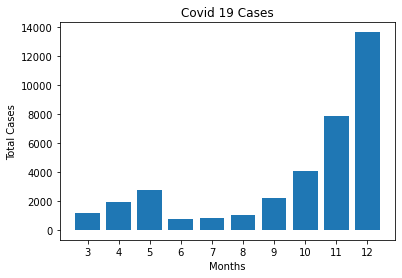

In [24]:
plt.bar('Month','DailyTotals',data=covid_data)
plt.title('Covid 19 Cases')
plt.xlabel('Months')
plt.ylabel('Total Cases')
plt.xticks(covid_data['Month'].unique())
plt.show()

In [ ]:
# it's clear from the above graph that the total cases were initially increasing. In june, July and August,the cases decreased.
# From september onwards the daily number of cases started to rise exponentially.

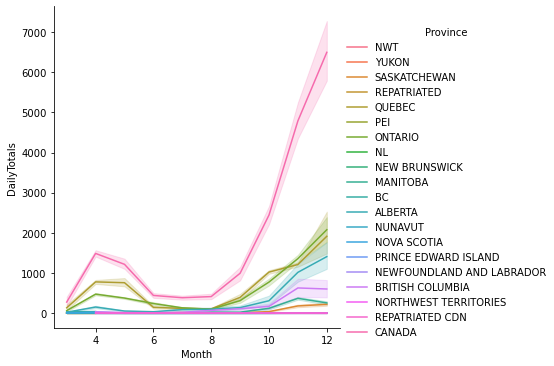

In [28]:
sns.relplot(x='Month',y='DailyTotals',hue='Province',kind='line',data=covid_data)

In [88]:
# the overall cases in canada have rapidly increased from september 2020 onwards. 
# We can also see a provincial wise increase in cases

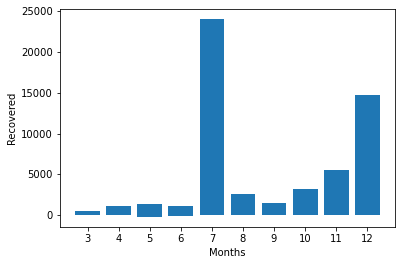

In [36]:
plt.bar('Month','DailyRecovered',data=covid_data)
plt.xlabel('Months')
plt.ylabel('Recovered')
plt.xticks(covid_data['Month'].unique())
plt.show()

In [60]:
# the number of people recovering each month is varying between low's and high's.